In [123]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, ode

## Gray Scott Equations (PDE)

Reaction: 
$$U + 2V \rightarrow 3V $$
$$ V -> P$$

$$\frac{\partial{u(x, y, t)}}{\partial{t}} = D_u \nabla^2 u - uv^2 + F (1-u)$$
$$\frac{\partial{v(x, y, t)}}{\partial{t}} = D_v \nabla^2 v + uv^2 - (F + k) v$$

Ignore the spatial terms:

$$\frac{d}{dt} 
\begin{bmatrix}
  u \\
  v
\end{bmatrix} = 
\begin{bmatrix}
  -uv^2 + F(1-u)\\
  uv^2 - (F+k)v
\end{bmatrix}$$

There are ODEs at each spatial point! We can numerically solve the ODE.

In [124]:
def fcn(t, y, F, k):
    # y: [u, v]
    u, v = y[0], y[1]
    uv2 = u*v*v
    return np.array([
        -uv2 + F * (1-u),
        uv2 - (F+k) * v
    ])

solver = ode(fcn).set_integrator('dopri5', method='bdf')

In [125]:
solver = solver.set_f_params(0.060, 0.062)

Text(0.5, 0, 'time')

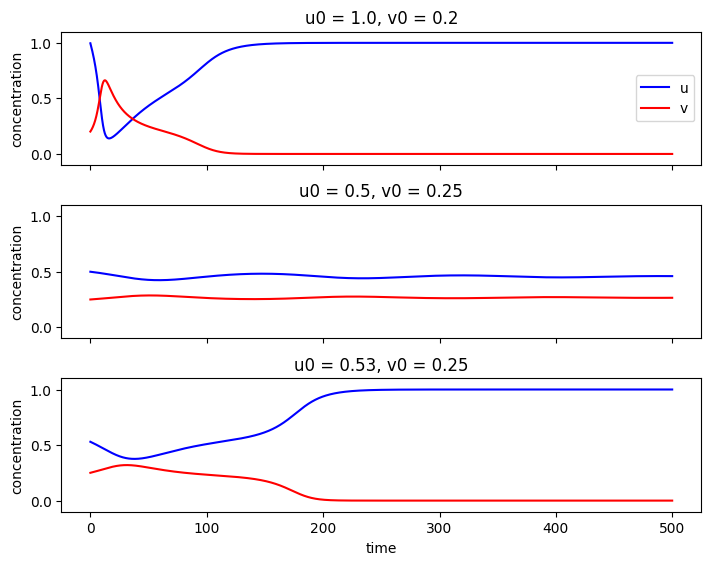

In [151]:

## initial conditions
initial_conds = [
    np.array([1.0, 0.2]),
    np.array([0.5, 0.25]),
    np.array([0.53, 0.25])

]

fig, ax = plt.subplots(nrows=len(initial_conds), sharex=True);
plt.subplots_adjust(wspace=0, hspace=0.3, left=0, bottom=0.0, top=1.0, right=1)

for i, ic in enumerate(initial_conds):
    solver = solver.set_initial_value(ic, t=0)
    t1 = 500
    dt = 0.1

    time = []
    uv = []
    while solver.successful() and solver.t < t1:
        time.append(solver.t)
        uv.append(solver.integrate(t = solver.t + dt))
        # print("t={:.3f}, {}".format(time[-1], uv[-1]))
    
    uv = np.array(uv)
    ax[i].plot(time, uv[:, 0], 'b-', label='u')
    ax[i].plot(time, uv[:, 1], 'r-', label='v')
    ax[i].set_title("u0 = {}, v0 = {}".format(ic[0], ic[1]))
    ax[i].set_ylim([-0.1, 1.1])
    ax[i].set_ylabel("concentration")
    
ax[0].legend();
ax[-1].set_xlabel("time")